0.44605905843961724


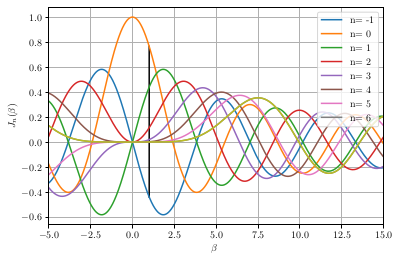

In [334]:
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import scipy.special as sc
import scipy.fftpack

import matplotlib
# Use the pgf backend (must be set before pyplot imported)
matplotlib.use("pgf")
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

plt.plot([1,1],[sc.jv(0,1),sc.jv(-1,1)],color = 'black')
for n in range (-1,7):
    x = np.linspace(-6,16,5000)
    y = sc.jv(n,x)
    plt.plot(x, y, '-',label='n= '+str(n))

plt.xlim(-5,15)
plt.grid(True)
plt.ylabel('$J_n(\\beta)$')
plt.xlabel(' $ \\beta $ ')
plt.plot(x, y)
plt.legend(loc ='upper right')
#plt.show()
plt.savefig('bessel.pgf', format='pgf')
print(sc.jv(2,2.5))

In [336]:

def fm(beta,fc = 100.0, fm = 20.0):
    # Number of samplepoints
    N = 10000
    # smple spacing
    T = 1.01 / 10000.0
    x = np.linspace(0.01, N*T, N)

    y_old = np.sin(fc * 2.0*np.pi*x+beta*np.sin(fm * 2.0*np.pi*x))
    y = 0*x
    xf = fftfreq(N, 1 / N)
    for k in range (-6, -1):
        y = sc.jv(k,beta)*np.sin((fc+k*fm) * 2.0*np.pi*x)
        yf = fft(y)*2/N
        plt.plot(xf, np.abs(yf),color ='black')
    for k in range (-1, 7):
        y = sc.jv(k,beta)*np.sin((fc+k*fm) * 2.0*np.pi*x)
        yf = fft(y)*2/N
        plt.plot(xf, np.abs(yf), label='n= '+str(k))
        #print(np.max(np.abs(yf)))
    # Controll section calculate the same but without Bessel
    #ytest = np.sin((fc*2.0*np.pi*x+beta*np.sin(2.0*np.pi*fm*x)))
    #yftest = fft(ytest)/(1.25*fc*2*np.pi**2)
    #print(np.max(np.abs(yftest)))#at beta <1 schould be the same as Bessel_0
    #print(sc.jv(0,beta)) # 

    #plt.plot(xf, np.abs(yftest),color ='green')

    #plt.plot(xf, np.broadcast_to(sc.jv(0,beta), xf.shape))
    plt.ylabel('$x_c$')
    plt.xlabel('Frequency')
    plt.legend(loc ='upper right')
    plt.xlim(-210, 210)
    plt.ylim(-0.02, 1)
    plt.yticks([n*0.1 for n in range(11)])

    


0.4400220583979506
0.7650335169330922
0.43996415145957635
0.11486465837592551
0.019554812540858224
0.002475419313722201
0.0002495808825852189
2.092251768518759e-05
1.5505258129190653
0.7651976865579666
0.5766874201718151
0.22384274440998883
0.576611528060809
0.35271480394486254
0.12888695231476485
0.033978978210005714
0.007034645158160526
0.001201520456140658
1.1690615944416967
0.22389077914123562
0.43998514245532633
0.7650335169330922
0.4399561840400751
0.11488091570707303
0.01955870691918784
0.0024758020933968792
0.0002496527817232054
2.0929196236830692e-05
1.5517195511888264
0.7651976865579666
0.4399460564802465
0.7648761496022143
0.439859206802787
0.11483347283557016
0.019548859742517567
0.002474584448928291
0.0002494884590618947
2.091408374323681e-05
1.0335602311914365
0.7651976865579666


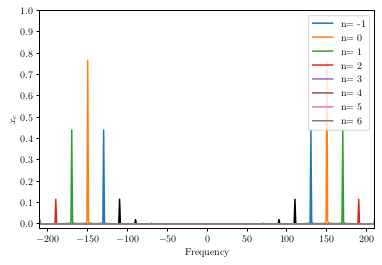

In [337]:
plt.cla()
plt.clf()
fm(1) 
plt.savefig('normal.pgf', format='pgf')
plt.cla()
plt.clf()
fm(2)
plt.savefig('beta_2.pgf', format='pgf')
plt.cla()
plt.clf()
fm(1, fc= 100.0,fm = 10)
plt.savefig('fm_10.pgf', format='pgf')
plt.cla()
plt.clf()
fm(1, fc = 150)
plt.savefig('fc_150.pgf', format='pgf')


In [ ]:
# Number of samplepoints
N = 800
# sample spacing
T = 1.0 / N
x = np.linspace(0.01, N*T, N)
fc = 100.0
fm = 25.0
beta = np.pi/4

y_old = np.sin(fc * 2.0*np.pi*x+beta*np.sin(fm * 2.0*np.pi*x))
yf_old = fft(y_old)/(100*np.pi)
xf = fftfreq(N, 1 / N)
plt.plot(xf, np.abs(yf_old))
plt.xlim(-200, 200)
plt.show()


In [ ]:
N = 800
# sample spacing
T = 1.0 / N
x = np.linspace(0.01, N*T, N)
fc = 100.0
fm = 10.0
beta = np.pi/4

y_old = np.sin(fc * 2.0*np.pi*x+beta*np.sin(fm * 2.0*np.pi*x))
yf_old = fft(y_old)/(100*np.pi)
xf = fftfreq(N, 1 / N)
plt.plot(xf, np.abs(yf_old))
plt.xlim(-200, 200)
plt.show()

In [ ]:
x = np.linspace(0,0.1,2000)
ratio = 2
first = 1
(length,)  = x.shape
slop = int(length/6)
second = ratio-first
odd = ratio % 2

first = int(first * length/ratio) 
second = int( second * length/ratio) + odd
slop = np.array(np.append(np.zeros(first-slop) , (np.arange(slop))/slop))
#steep = np.ones(int(first * length/ratio)+ odd) - np.exp(-np.arange(int(first * length/ratio) + odd)/200)
steep = (np.ones(first) + slop)*0.5

step = np.append(steep,  np.ones(second))
m = np.sin(5 * 2.0 * np.pi * x) * step 
plt.plot(x, step, '-')
plt.plot(x, m, '-')
plt.savefig('m_t.pgf', format='pgf')

Nat Modulationsarten

/tmp/ipykernel_26508/588900419.py:52: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


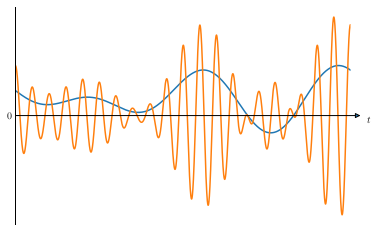

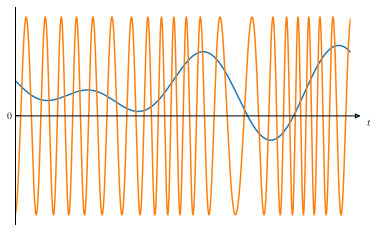

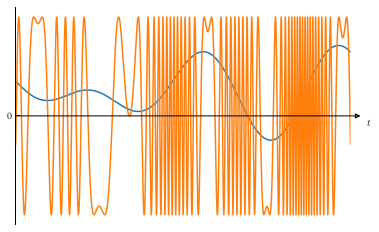

In [381]:
t = np.linspace(-1.2,1.2,500000)

# m(t)
k = 0.25
dc = 0.25
f1 = 1
f2 = 1.4

# x_c(t)
fc = 10
kp = 1.5 * 2 * np.pi
kf = 15

m = dc + k* np.cos(2*np.pi*f1*t) + k*np.sin(2*np.pi*f2*t)

AM = 2* m* np.cos(2* np.pi *fc*t)

PM = 1* np.cos(2* np.pi * fc*t+kp*m)

dt= t[1]-t[0]
phi = kp * m + np.gradient(PM,dt)


phidt =  np.append(0, kf*2*np.pi*m[:-1]) #? Correct?
FM = 1* (np.cos(2 *np.pi *fc *t + phidt))

def preplot():   
    from mpl_toolkits.axisartist.axislines import AxesZero

    fig = plt.figure()
    ax = fig.add_subplot(axes_class=AxesZero)
    ax.axis["xzero"].set_axisline_style("-|>")
    # adds X and Y-axis from the origin
    ax.axis["xzero"].set_visible(True)
    ax.axis["right", "bottom", "top"].set_visible(False)
    ax.set_yticks([0])
    ax.set_xticks([])
    plt.text(1.1, -0.1,'$t$')
    plt.xlim(-1)
    plt.plot(t, m, '-')
    

preplot()
plt.plot(t, AM,'-')
plt.savefig('AM.pgf', format='pgf')
preplot()
plt.plot(t,PM, '-')
plt.savefig('PM.pgf', format='pgf')
preplot()
plt.plot(t,FM, '-')
plt.savefig('FM.pgf', format='pgf')
plt.show()

/tmp/ipykernel_26508/2793603718.py:16: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


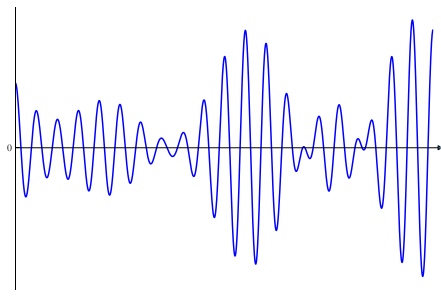

In [364]:



plt.plot(t, AM,'b')

plt.show()
